In [8]:
# Importing Important Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import metrics
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [9]:
# Supressing the Warnings
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Loading the data into a DataFrame
df=pd.read_csv("LoanData.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64


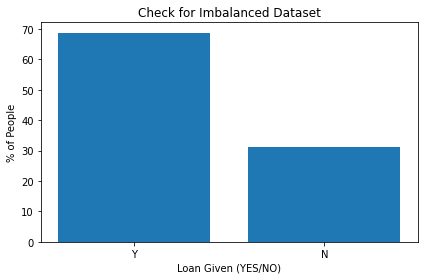

In [11]:
# checking if the dataset is Imbalanced or not 

print(df.Loan_Status.value_counts()/df.shape[0]*100)
plt.bar(df.Loan_Status.value_counts().keys(),df.Loan_Status.value_counts()/df.shape[0]*100)
plt.xlabel("Loan Given (YES/NO)")
plt.ylabel("% of People")
plt.title("Check for Imbalanced Dataset")
plt.tight_layout()

From the above bar chart we get the idea that the target data column i.e the dependent feature(Loan_Status) is Skewed and not properly distributed. So the dataset that we have is imbalanced. Now, we need to apply some methodology to handle the imbalance dataset.

In [12]:
# checjking for the null values in dataframe
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

So, as we can see that there are null values in Gender,Marries,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term ,Credit_History columns. We need to use techniques specific to our requirements to handle the missing values.<br>
If the feature is continious one then we wil replace the missing values with the median value.<br>
If, the feature is categorical then we will use the mode of the feature to fill in the missing values.

In [13]:
# Identifying the unique values and the data type of each features 
for i in df.columns[1:]:
    print("Unique labels for {} = ({},  {}) ".format(i,df[i].nunique(),df[i].dtype))

Unique labels for Gender = (2,  object) 
Unique labels for Married = (2,  object) 
Unique labels for Dependents = (4,  object) 
Unique labels for Education = (2,  object) 
Unique labels for Self_Employed = (2,  object) 
Unique labels for ApplicantIncome = (505,  int64) 
Unique labels for CoapplicantIncome = (287,  float64) 
Unique labels for LoanAmount = (203,  float64) 
Unique labels for Loan_Amount_Term = (10,  float64) 
Unique labels for Credit_History = (2,  float64) 
Unique labels for Property_Area = (3,  object) 
Unique labels for Loan_Status = (2,  object) 


In [14]:
# Handling the missing values+ One hot encoding

# Replacing Male with value 1 and Female with value 0 and Nan values with the most occuring label among them 
df.Gender.replace({"Male": 1, "Female": 0},inplace=True)
df.Gender.replace({np.nan: df.Gender.value_counts().keys()[0]},inplace=True)

In [15]:
# Same as what done for the Gender feature 
df.Married.replace({"Yes": 1, "No": 0},inplace=True)
df.Married.replace({np.nan: df.Married.value_counts().keys()[0]},inplace=True)


In [16]:
# Replacing Yes with value 1 and No with value 0 and Nan values with the most occuring label among them 

df.Self_Employed.replace({"Yes": 1, "No": 0},inplace=True)
df.Self_Employed.replace({np.nan: df.Self_Employed.value_counts().keys()[0]},inplace=True)

In [17]:
# Using one-hot enconding to replace string data with numeric data
df.Education.replace({"Graduate": 1, "Not Graduate": 0},inplace=True)
df.Property_Area.replace({"Urban": 1, "Rural": 0,"Semiurban":2},inplace=True)

In [18]:
# Using One-Hot encoding to replace missing values with the most occuring value for the Credit_History feature
df.Credit_History.replace({np.nan:df.Credit_History.value_counts().keys()[0]},inplace=True)


In [19]:
# For the continious variable replacing the missing values with the median of the loan amount.
df.LoanAmount.replace({np.nan: df.LoanAmount.median()},inplace=True)

In [20]:
# For continous feature replacing the nan value with the median of the feature
df.Loan_Amount_Term.replace({np.nan:df.Loan_Amount_Term.median()},inplace=True)


In [21]:
# Assigning different numerical labels for the Dependents variable
df.Dependents.replace({"0":0,"1":1,"2":2,"3+":3},inplace=True)
df.Dependents.replace({np.nan:df.Dependents.value_counts()[0]},inplace=True)

In [22]:
# Replacing Yes with value 1 and No with value 0 
df.Loan_Status.replace({"Y":1,"N":0},inplace=True)

In [23]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,128.0,360.0,1.0,1,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,1


In [24]:
# Checking if all the missing data has been handled or not
df.isnull().sum().sum()

0

From the above cell we get to see that all the missing values have been handled and there are no missing values present anymore in the entire dataframe.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    float64
 2   Married            614 non-null    float64
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 62.5+ KB


Due to the presence of null values certain attributes came out to be floating points but now as the null values have been taken care of , we can turn them into integeres.


In [37]:
df.Gender=df.Gender.astype('int64')
df.Married=df.Married.astype('int64')
df.Dependents=df.Dependents.astype('int64')
df.Self_Employed=df.Self_Employed.astype('int64')
df.Credit_History=df.Credit_History.astype('int64')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    int64  
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 62.5+ KB


In [39]:
# Separating out the feature and target variable in terms of X and Y
Y=df.Loan_Status                                            # Target
df.drop(["Loan_ID","Loan_Status"],axis=1,inplace=True)      # Features
X=df

In [40]:
# Splitting the entire dataset in train and test sets to evaluate the model performance in 70:30 ratio
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.30, random_state=42,stratify=Y)

##### 1. Building a Basic ML Model

In [41]:
# Basic Model building withthe default values of the hyperparameters
rf1 = RandomForestClassifier()               # The classifier model
rf1.fit(X_train,Y_train)                     # Training the model with the training set data
Y_pred=rf1.predict(X_test)                   # Predicting the target values with the test set data

In [42]:
# Confusion Matrix
confusion_matrix1 = metrics.confusion_matrix(Y_test, Y_pred)
confusion_matrix1

array([[ 36,  22],
       [ 10, 117]], dtype=int64)

In [43]:
# Matrix values
TP = confusion_matrix1[1,1] # true positive 
TN = confusion_matrix1[0,0] # true negatives
FP = confusion_matrix1[0,1] # false positives
FN = confusion_matrix1[1,0] # false negatives

In [46]:
# accuracy of the model 
print("Accuracy : {:.2f}".format(metrics.accuracy_score(Y_test, Y_pred)*100), "%")
# sensitivity of the model
print("Sensitivity : {:.2f} %".format((TP / float(TP+FN))*100))
# specificity of the model 
print("Specificity : {:.2f} %".format((TN / float(TN+FP))*100))
# f1_score of the model
print("f1_score : {:.2f} %".format(metrics.f1_score(Y_test, Y_pred)*100), "%")

Accuracy : 82.70 %
Sensitivity : 92.13 %
Specificity : 62.07 %
f1_score : 87.97 % %


In [45]:
# classification Report 
print(metrics.classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.62      0.69        58
           1       0.84      0.92      0.88       127

    accuracy                           0.83       185
   macro avg       0.81      0.77      0.79       185
weighted avg       0.82      0.83      0.82       185



###### Note: 
As can be seen from the above ML model without any hyperparameter tuning and using all the features we have been able to build a model with accuracy of 82.16% and Sensitivity of 92.13%. Now we will try to make a ML model with the optimum hypreparameters and make a selection of the most important features among all the features we have so that we can get a better result.<br>
As we had discussed that the dataset we have is slightly skewed so we would focus more on the f1 score rather than the accuracy of the model.

##### 2. Building a ML Model with tuned Hyperparameters

***Hyperparametes for a Random Forest Classifier Model***
- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)

In [48]:
# Creating a Parameter Grid

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']

#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

#Minimum number of samples required to split a node
min_samples_split = randint(1,10)

# Minimum number of samples required at each leaf node
min_samples_leaf = randint(1,10)

# Method of selecting samples for training each tree
bootstrap = [True, False]

#Method to select the tree building criterion
criterion = ["gini", "entropy"]



random_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
                'criterion':criterion}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D102B3F7F0>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D102B3F9D0>, 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']}


In [49]:
# Using the random grid to search for best hyperparameters 

%time

rf2 = RandomForestClassifier()                                     

# Performing a 10 fold cross validation with 50 iteration so total 50*10=500 combinations 
rf_random = RandomizedSearchCV(estimator = rf2, param_distributions = random_grid, n_iter = 50,
                               cv = 10, verbose=2, random_state=42, n_jobs = -1)

#Fit the random search model to get the best parameters 
rf_random.fit(X_train, Y_train)

CPU times: total: 0 ns
Wall time: 0 ns
Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D102B3F9D0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D102B3F7F0>,
                                        'n_estimators': [200, 400, 600, 800,
                                                   

In [56]:
# checking what parameters will perform the best for the RandomForest classifier model
bestParameters=rf_random.best_params_
print(bestParameters)
print(rf_random.best_score_)

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 110, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 7, 'n_estimators': 2000}
0.7971207087486157


In [57]:
# Building  the model with optimal Parameters 
classifier1=RandomForestClassifier(**bestParameters)
classifier1

RandomForestClassifier(criterion='entropy', max_depth=110, min_samples_leaf=5,
                       min_samples_split=7, n_estimators=2000)

In [58]:
# Model fitting with the optimal parameters 
classifier1.fit(X_train,Y_train)
Y_pred2=classifier1.predict(X_test)


In [59]:
confusion_matrix2 = metrics.confusion_matrix(Y_test, Y_pred2)
confusion_matrix2

array([[ 33,  25],
       [  4, 123]], dtype=int64)

In [60]:
# Matrix values
TP1 = confusion_matrix2[1,1] # true positive 
TN1 = confusion_matrix2[0,0] # true negatives
FP1 = confusion_matrix2[0,1] # false positives
FN1 = confusion_matrix2[1,0] # false negatives

In [61]:
# accuracy of the model 
print("Accuracy : {:.2f}".format(metrics.accuracy_score(Y_test, Y_pred2)*100), "%")
# sensitivity of the model
print("Sensitivity : {:.2f} %".format((TP1 / float(TP1+FN1))*100))
# specificity of the model 
print("Specificity : {:.2f} %".format((TN1 / float(TN1+FP1))*100))
# f1_score of the model
print("f1_score : {:.2f} %".format(metrics.f1_score(Y_test, Y_pred2)*100), "%")

Accuracy : 84.32 %
Sensitivity : 96.85 %
Specificity : 56.90 %
f1_score : 89.45 % %


##### Note:
As can be seen, after tuning the hyperparameters, both the Accuracy,Sensitivity and f1 score all the evaluation matrix parameters have increased.<br>
Accuracy has increased by : 1.62%<br>
Sensitivity has increased by:4.72%<br>
f1_score has increased by: 1.48%

##### 3. Building a ML Model with tuned Hyperparameters + Upsampling of the imbalanced dataset using SMOTE

In [68]:
# Using SMOTE to upsample the train data due to the imbalance in the dataset 

from imblearn.over_sampling import SMOTE
from collections import Counter

oversample=SMOTE()

X_train_rs,Y_train_rs=oversample.fit_resample(X_train,Y_train)
Count1=Counter(Y_train)
Count2=Counter(Y_train_rs)
print("Before Upsampling : ",Count1)
print("After Upsampling : ",Count2)

Before Upsampling :  Counter({1: 295, 0: 134})
After Upsampling :  Counter({1: 295, 0: 295})


In [88]:
classifier2=RandomForestClassifier(**bestParameters)
classifier2.fit(X_train_rs,Y_train_rs)

RandomForestClassifier(criterion='entropy', max_depth=110, min_samples_leaf=5,
                       min_samples_split=7, n_estimators=2000)

In [89]:
Y_pred3=classifier2.predict(X_test)

In [90]:
confusion_matrix3 = metrics.confusion_matrix(Y_test, Y_pred3)
confusion_matrix3

array([[ 38,  20],
       [ 20, 107]], dtype=int64)

In [91]:
# Matrix values
TP1 = confusion_matrix2[1,1] # true positive 
TN1 = confusion_matrix2[0,0] # true negatives
FP1 = confusion_matrix2[0,1] # false positives
FN1 = confusion_matrix2[1,0] # false negatives

In [92]:
# accuracy of the model 
print("Accuracy : {:.2f}".format(metrics.accuracy_score(Y_test, Y_pred3)*100), "%")
# sensitivity of the model
print("Sensitivity : {:.2f} %".format((TP1 / float(TP1+FN1))*100))
# specificity of the model 
print("Specificity : {:.2f} %".format((TN1 / float(TN1+FP1))*100))
# f1_score of the model
print("f1_score : {:.2f} %".format(metrics.f1_score(Y_test, Y_pred3)*100), "%")

Accuracy : 78.38 %
Sensitivity : 96.85 %
Specificity : 56.90 %
f1_score : 84.25 % %


As can be seen from the above analysis that using SMOTE to handle the imbalance dataset for prediction have not resulted good in fetching improved result. So we are not going to use the upsampling method for our way forward.

##### 4. Building a ML Model with tuned Hyperparameters and Best features

In [95]:
classifier3=RandomForestClassifier(**bestParameters)
classifier3.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=110, min_samples_leaf=5,
                       min_samples_split=7, n_estimators=2000)

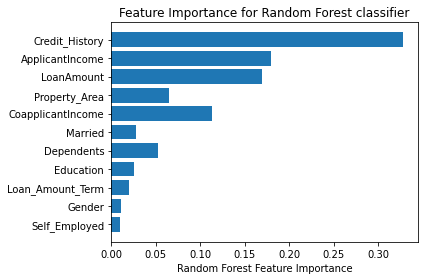

In [96]:
sorted_idx = classifier2.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx], classifier3.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance for Random Forest classifier")
plt.tight_layout()

In [98]:
# Get numerical feature importances
importances = list(classifier1.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(list(df.columns), importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: Credit_History       Importance: 0.33
Variable: ApplicantIncome      Importance: 0.18
Variable: LoanAmount           Importance: 0.17
Variable: CoapplicantIncome    Importance: 0.12
Variable: Property_Area        Importance: 0.06
Variable: Dependents           Importance: 0.05
Variable: Married              Importance: 0.03
Variable: Education            Importance: 0.03
Variable: Loan_Amount_Term     Importance: 0.02
Variable: Gender               Importance: 0.01
Variable: Self_Employed        Importance: 0.01


[None, None, None, None, None, None, None, None, None, None, None]

In [99]:
# checking the most important features that can be used for the classification 
ImpFeatures=[]
for i in feature_importances:
    if i[1]>= 0.05:
        ImpFeatures.append(i[0])
print("Most Important Features are :",ImpFeatures)

Most Important Features are : ['Credit_History', 'ApplicantIncome', 'LoanAmount', 'CoapplicantIncome', 'Property_Area', 'Dependents']


In [100]:
# Re-creating the dataframe with the important features only 
Data={}
for i in ImpFeatures:
    if i in df.columns:
        Data[i]=df[i]
features=pd.DataFrame(Data)

features.head()

,Credit_History,ApplicantIncome,LoanAmount,CoapplicantIncome,Property_Area,Dependents
0,1,5849,128.0,0.0,1,0
1,1,4583,128.0,1508.0,0,1
2,1,3000,66.0,0.0,1,0
3,1,2583,120.0,2358.0,1,0
4,1,6000,141.0,0.0,1,0


In [101]:
X_train1,X_test1,Y_train1,Y_test1=train_test_split(features, Y, test_size=0.30, random_state=42,stratify=Y)

In [103]:
classifier3.fit(X_train1,Y_train1)
Y_pred4=classifier3.predict(X_test1)

In [104]:
confusion_matrix3 = metrics.confusion_matrix(Y_test1, Y_pred4)
confusion_matrix3

array([[ 34,  24],
       [  6, 121]], dtype=int64)

In [105]:
# Matrix values
TP2 = confusion_matrix3[1,1] # true positive 
TN2 = confusion_matrix3[0,0] # true negatives
FP2 = confusion_matrix3[0,1] # false positives
FN2 = confusion_matrix3[1,0] # false negatives

In [107]:
# accuracy of the model 
print("Accuracy : {:.2f}".format(metrics.accuracy_score(Y_test1, Y_pred3)*100), "%")
# sensitivity of the model
print("Sensitivity : {:.2f} %".format((TP2 / float(TP2+FN2))*100))
# specificity of the model 
print("Specificity : {:.2f} %".format((TN2 / float(TN2+FP2))*100))
# f1_score of the model
print("f1_score : {:.2f} %".format(metrics.f1_score(Y_test, Y_pred4)*100), "%")

Accuracy : 78.38 %
Sensitivity : 95.28 %
Specificity : 58.62 %
f1_score : 88.97 % %


#### Conclusion:
It is evident from the analysis that among all the 4 models that we made with the RandomForest algorithm, we got the best outcome when we used the 2nd model which was made using the best parameters and keeping all the independent features without any upsampling.<br>
So we are going to save the model classifier1 using pickle for further usage.

##### Saving the ML model for using it in the web application in a .pkl file.

In [108]:
import pickle

In [109]:
# open a file, where you ant to store the data
file = open('LoanClassification.pkl', 'wb')

# dump information to that file
pickle.dump(classifier1, file)

In [110]:
model = open('LoanClassification.pkl','rb')
classifierModel = pickle.load(model)

In [111]:
y_prediction = classifierModel.predict(X_test)

In [112]:
metrics.accuracy_score(Y_test,y_prediction)

0.8432432432432433

In [113]:
metrics.f1_score(Y_test,y_prediction)

0.8945454545454545

##### Deployed Model
The ML model has been deployed using heroku. The link to that application is pasted below.<br>
Link: https://loan-classifier-kd.herokuapp.com/

<h4 align="center"> Thank You! </h4>